<a href="https://colab.research.google.com/github/Surajpatra700/Deep-Learning_Project/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# COMPUTER VISION ---> Its a field of Deep Learning in which the machine interprets Visual images/ videos similar to that of Human Eyes

In [ ]:
# FILTERS --->(Feature Detectors)

# In a Convolutional Neural Network (CNN), filters are small, learnable, and typically 2D arrays used to extract features from input data,
# such as images. These filters slide (convolve) over the input, element-wise multiplying and summing values.
# They help detect patterns like edges, textures, or more complex features in the data, enabling the network to learn hierarchical representations.
# The output of these convolutions is often referred to as feature maps, which serve as input for subsequent layers in the CNN, ultimately aiding in tasks like image recognition.

In [ ]:
# POOLING -->

# Pooling in a Convolutional Neural Network (CNN) is a downsampling operation that reduces the spatial dimensions of feature maps
# while retaining their important information. It involves sliding a window (usually 2x2 or 3x3) over the input, and for each window,
# taking the maximum (MaxPooling) or average (AveragePooling) value. This reduces the computational load and helps make the network more robust to small spatial translations,
# enhancing its ability to recognize patterns in different parts of the image. Pooling helps reduce the number of parameters and control overfitting in the network.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train = y_train.reshape(-1,) # Reducing the two dimension array to one-Dimemsion array
y_train[:5]
# y_test[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
def plot_image(X,y,index):
  plt.figure(figsize=(10,2))
  #plt.xlabel(classes[y_test[index][0]])
  plt.xlabel(classes[y[index]])
  return plt.imshow(X[index])

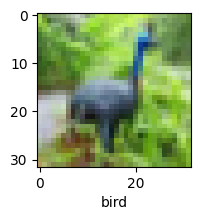

In [ ]:
plot_image(X_train, y_train, 6)

In [ ]:
X_train = X_train/255
y_train = y_train/255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="sigmoid"),
])

ann.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 133s 83ms/step - loss: 0.0033 - accuracy: 0.0999
Epoch 2/5
1563/1563 [==============================] - 125s 80ms/step - loss: 3.1086e-04 - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.9770e-04 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4757e-04 - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 126s 80ms/step - loss: 1.1851e-04 - accuracy: 0.1000


In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 23ms/step - loss: 5232.6187 - accuracy: 0.1000


[5232.61865234375, 0.10000000149011612]

In [ ]:
ann.predict(X_test)

313/313 [==============================] - 9s 29ms/step


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 8s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# CNN

In [ ]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 59s 37ms/step - loss: 0.0038 - accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 57s 36ms/step - loss: 7.8640e-09 - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 57s 37ms/step - loss: 6.9416e-09 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 60s 38ms/step - loss: 5.5806e-09 - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 57s 37ms/step - loss: 3.7214e-09 - accuracy: 0.1000


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 16238.7246 - accuracy: 0.1000


[16238.724609375, 0.10000000149011612]

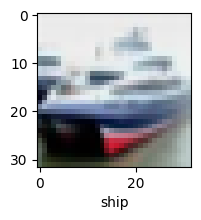

In [ ]:
y_test = y_test.reshape(-1,)
plot_image(X_test,y_test,1)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 0, 0]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

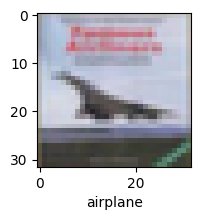

In [ ]:
plot_image(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
# ***************** Practise Question *******************

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train,y_train), (X_test,y_test) = datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_test[8:12]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [ ]:
classes_List = ["0","1","2","3","4","5","6","7","8","9"]

In [ ]:
def plot_digits(X,y,index):
  plt.figure(figsize=(10,2))
  plt.matshow(X[index])
  # plt.xlabel(classes_List[y[index]])
  plt.title(classes_List[y[index]])

<Figure size 1000x200 with 0 Axes>

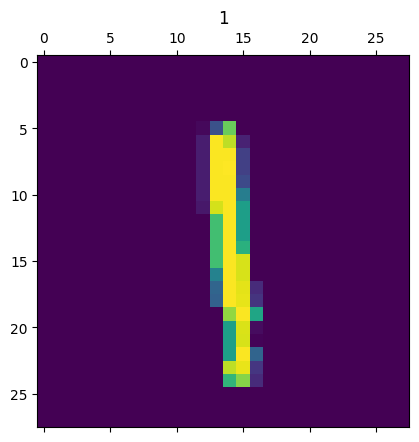

In [ ]:
plot_digits(X_train, y_train, 8)

In [ ]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=28, kernel_size=(3,3), activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=30, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(28, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
cnn.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
cnn.fit(X_train,y_train,epochs=5)

In [ ]:
cnn.evaluate(X_test,y_test)

In [ ]:
# ************************ DATA AUGUMENTATION *******************

# Its a process of modifying an existing image i.e applying rotation, contrast, zoom so that it if we dont have any rotated image while training, on giving a rotated testing dataset it could perform better

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url, cache_dir='.', untar=True) # get_file is func. in tf that gets the dataset_url downloaded in 'flower_photos' directory '.' i.e within root directory & untar=True means as it is a zip file it will unzip it

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
 list(data_dir.glob("*/*.jpg")) # It will list the path of all the images present within data_dir path with .jpg extension

[PosixPath('datasets/flower_photos/tulips/3511776685_3635087b12_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/16680998737_6f6225fe36.jpg'),
 PosixPath('datasets/flower_photos/tulips/14093907931_dd8f642574.jpg'),
 PosixPath('datasets/flower_photos/tulips/9947374414_fdf1d0861c_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14064731501_ea14b58161.jpg'),
 PosixPath('datasets/flower_photos/tulips/17165583356_38cb1f231d_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/13561912705_e5eeb41433_z.jpg'),
 PosixPath('datasets/flower_photos/tulips/3991742794_edebc6c8a0_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8713397694_bcbcbba2c2_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4589624702_b6baa83699_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/15275199229_962387f24d.jpg'),
 PosixPath('datasets/flower_photos/tulips/16986144192_55e0e6c152.jpg'),
 PosixPath('datasets/flower_photos/tulips/4522130258_9ee44cf73f_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/16110795216_

In [ ]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/410421672_563550467c.jpg'),
 PosixPath('datasets/flower_photos/roses/14993880427_95d0f27257.jpg'),
 PosixPath('datasets/flower_photos/roses/218630974_5646dafc63_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4797595918_79887b1229_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4414135084_1ac7e6cd54.jpg')]

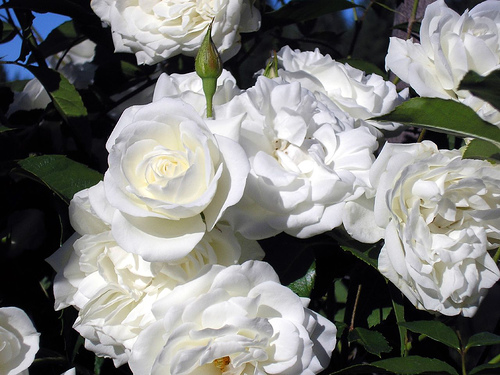

In [ ]:
PIL.Image.open(str(roses[0]))

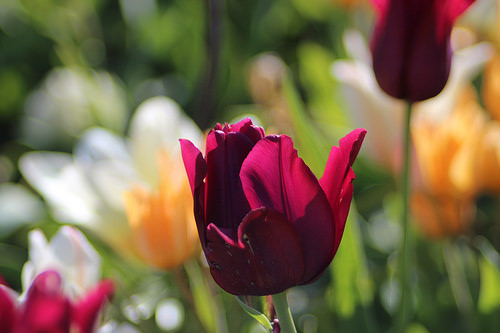

In [ ]:
tulips = list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[2]))

In [ ]:
# Creating a Dictionary to store paths of all images, it would be helpful for model training
flower_images_dict = {
    "roses": list(data_dir.glob("roses/*")),
    "daisy": list(data_dir.glob("daisy/*")),
    "dandelion": list(data_dir.glob("dandelion/*")),
    "sunflowers": list(data_dir.glob("sunflowers/*")),
    "tulips": list(data_dir.glob("tulips/*")),
}

In [ ]:
flower_labels_dict = {
    "roses": 0,
    "daisy": 1,
    "dandelion": 2,
    "sunflowers": 3,
    "tulips": 4,
}

In [ ]:
str(flower_images_dict["roses"][0])

'datasets/flower_photos/roses/410421672_563550467c.jpg'

In [ ]:
img = cv2.imread(str(flower_images_dict["roses"][0])) # cv2.imread() reads the string directory of image and converts into numpy array of dimension 3
img

array([[[195, 103,  60],
        [194, 105,  55],
        [110,  53,  22],
        ...,
        [155, 130, 134],
        [145, 122, 126],
        [146, 123, 127]],

       [[192, 107,  59],
        [199, 114,  58],
        [124,  71,  28],
        ...,
        [192, 168, 168],
        [192, 171, 170],
        [193, 172, 171]],

       [[191, 107,  55],
        [197, 110,  53],
        [156,  95,  45],
        ...,
        [187, 165, 160],
        [183, 163, 158],
        [179, 159, 154]],

       ...,

       [[ 98, 116, 123],
        [ 97, 116, 121],
        [ 99, 119, 124],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[101, 115, 121],
        [100, 116, 122],
        [101, 120, 125],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[108, 120, 126],
        [105, 119, 125],
        [102, 121, 126],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]]

In [ ]:
img.shape

(375, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flower_images_dict.items(): # here image is actualy a path
  #print(flower_name, len(images))


In [ ]:
# ************************* TRANSFER LEARNING **************************

In [ ]:
# Transfer learning in image classification deep learning is a technique where a pre-trained neural network model is used as a starting point for a new, related task. Instead of training a neural network from scratch, you leverage the knowledge gained from the pre-trained model on a large dataset to improve the performance on a specific task or dataset with limited data.

In [3]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=IMAGE_SHAPE+(3,))
])

In [6]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [8]:
# ****************************************** OBJECT DETECTION **********************************